In [1]:
import numpy as np
import tensorflow as tf
import util
import numpy as np
import tensorflow as tf
import util
import torch
from keras.utils.np_utils import *
from keras.datasets import mnist
MNIST_CLASSIFIER_FROZEN_GRAPH ='/home/imi432_006/huangdengrong/GAN-Research/metrics_gan/metrics/classify_mnist_graph_def.pb'
INPUT_TENSOR = 'inputs:0'
OUTPUT_TENSOR = 'logits:0'
def calculate_labels(images,epoch,global_step):
    images=[cv2.resize(i,(28,28)) for i in images]
    images=np.expand_dims(images,axis=3)
    label_dict={}
    for i in range(10):
        label_dict[i]=0
    eval_images = tf.convert_to_tensor(images)
    y_logit = util.mnist_logits(eval_images, MNIST_CLASSIFIER_FROZEN_GRAPH, INPUT_TENSOR, OUTPUT_TENSOR)
    labels=tf.argmax(y_logit, 1)
    labels=tf.Session().run(labels)
    for data in labels:
        label_dict[data]+=1
    for i in range(10):
        label_dict[i]=label_dict[i]/len(images)
    max_value=max(label_dict.values())
    min_value=min(label_dict.values())
    print('epoch:%d   global_step:%d'%(epoch,global_step))
    print(label_dict)
    print('chazhi:%.8f'%(max_value-min_value))
    return label_dict,max_value-min_value

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_5 (Conv2DTr (None, 4, 4, 512)         147968    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 8, 8, 256)         1179904   
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 16, 16, 128)       295040    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 32, 32, 64)        73792     
__________

epoch:7   global_step:6800
{0: 0.0627, 1: 0.1896, 2: 0.0482, 3: 0.0811, 4: 0.147, 5: 0.0409, 6: 0.053, 7: 0.1781, 8: 0.0664, 9: 0.133}
chazhi:0.14870000
epoch:7   global_step:7000
{0: 0.0765, 1: 0.1992, 2: 0.0452, 3: 0.0626, 4: 0.1404, 5: 0.0392, 6: 0.0565, 7: 0.1747, 8: 0.0699, 9: 0.1358}
chazhi:0.16000000
epoch:7   global_step:7200
{0: 0.0775, 1: 0.1949, 2: 0.0519, 3: 0.0749, 4: 0.1449, 5: 0.0373, 6: 0.0532, 7: 0.1722, 8: 0.0652, 9: 0.128}
chazhi:0.15760000
epoch:7   global_step:7400
{0: 0.0567, 1: 0.2201, 2: 0.0462, 3: 0.0907, 4: 0.126, 5: 0.0434, 6: 0.0442, 7: 0.1823, 8: 0.0662, 9: 0.1242}
chazhi:0.17670000
epoch:8   global_step:7600
{0: 0.0632, 1: 0.2154, 2: 0.0425, 3: 0.0688, 4: 0.1618, 5: 0.0406, 6: 0.0457, 7: 0.1829, 8: 0.0622, 9: 0.1169}
chazhi:0.17480000
epoch:8   global_step:7800
{0: 0.0672, 1: 0.2196, 2: 0.0372, 3: 0.0817, 4: 0.1193, 5: 0.0361, 6: 0.0489, 7: 0.1827, 8: 0.0711, 9: 0.1362}
chazhi:0.18350000
epoch:8   global_step:8000
{0: 0.0667, 1: 0.2048, 2: 0.043, 3: 0.066,

epoch:18   global_step:17400
{0: 0.0182, 1: 0.4038, 2: 0.0168, 3: 0.053, 4: 0.0833, 5: 0.0592, 6: 0.0237, 7: 0.1608, 8: 0.0416, 9: 0.1396}
chazhi:0.38700000
epoch:18   global_step:17600
{0: 0.0208, 1: 0.4066, 2: 0.0164, 3: 0.0561, 4: 0.0752, 5: 0.0637, 6: 0.0218, 7: 0.1563, 8: 0.0373, 9: 0.1458}
chazhi:0.39020000
epoch:18   global_step:17800
{0: 0.0185, 1: 0.4115, 2: 0.0149, 3: 0.058, 4: 0.0796, 5: 0.0595, 6: 0.0161, 7: 0.1528, 8: 0.0388, 9: 0.1503}
chazhi:0.39660000
epoch:19   global_step:18000
{0: 0.0216, 1: 0.4166, 2: 0.0143, 3: 0.055, 4: 0.0761, 5: 0.0551, 6: 0.02, 7: 0.1793, 8: 0.0371, 9: 0.1249}
chazhi:0.40230000
epoch:19   global_step:18200
{0: 0.0206, 1: 0.4222, 2: 0.0131, 3: 0.0554, 4: 0.0824, 5: 0.055, 6: 0.0183, 7: 0.1656, 8: 0.033, 9: 0.1344}
chazhi:0.40910000
epoch:19   global_step:18400
{0: 0.0209, 1: 0.4401, 2: 0.0151, 3: 0.0518, 4: 0.0768, 5: 0.0459, 6: 0.0173, 7: 0.1609, 8: 0.0356, 9: 0.1356}
chazhi:0.42500000
epoch:19   global_step:18600
{0: 0.0157, 1: 0.4298, 2: 0.01

epoch:29   global_step:28000
{0: 0.002, 1: 0.672, 2: 0.0029, 3: 0.0301, 4: 0.0222, 5: 0.0347, 6: 0.0026, 7: 0.1496, 8: 0.0088, 9: 0.0751}
chazhi:0.67000000


No handles with labels found to put in legend.


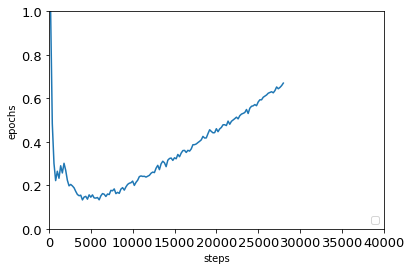

In [3]:
import torch.utils.data as Data
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10,fashion_mnist,mnist
import os
from scipy import misc
import numpy as np
import tensorflow as tf
import keras.backend as K
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D,LeakyReLU,Conv2DTranspose, Conv2D
from keras.optimizers import Adam
import os
from keras.layers.convolutional import _Conv
from keras.legacy import interfaces
from keras.engine import InputSpec
import cv2
import keras.backend.tensorflow_backend as KTF

from scipy import misc
def set_gpu_config(device = "0",fraction=0.25):
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = fraction
    config.gpu_options.visible_device_list = device
    KTF.set_session(tf.Session(config=config))


def predict_images(file_name, generator, noise_size, n = 10, size = 32):

    image = generator.predict(np.random.normal(size=(n*n, ) + noise_size))

    image = np.reshape(image, (n, n, size, size, 3))
    image = np.transpose(image, (0, 2, 1, 3, 4))
    image = np.reshape(image, (n*size, n*size, 3))

    image = 255 * (image + 1) / 2
    image = image.astype("uint8")
    misc.imsave(file_name, image)
def build_generator(input_shape):
    model = Sequential()

    model.add(Conv2DTranspose(512,(3,3),strides=(2,2),padding="same",input_shape=input_shape))
    model.add(LeakyReLU(0.2))

    model.add(Conv2DTranspose(256,(3,3),strides=(2,2),padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2DTranspose(128,(3,3),strides=(2,2),padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2DTranspose(64,(3,3),strides=(2,2),padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,(3,3),padding="same",activation="tanh"))
    model.summary()
    return model


def build_discriminator(input_shape):
    model = Sequential()

    model.add(SNConv2D(64,(3,3),strides=(2,2),padding="same",input_shape=input_shape))
    model.add(LeakyReLU(0.2))

    model.add(SNConv2D(128,(3,3),strides=(2,2),padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(SNConv2D(256,(3,3),strides=(2,2),padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(SNConv2D(512,(3,3),strides=(2,2),padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(SNConv2D(1,(3,3),padding="same"))
    model.add(GlobalAveragePooling2D())
    model.summary()

    return model

def build_functions(batch_size, noise_size, image_size, generator, discriminator):

    noise = K.random_normal((batch_size,) + noise_size,0.0,1.0,"float32")
    real_image = K.placeholder((batch_size,) + image_size)
    fake_image = generator(noise)

    d_input = K.concatenate([real_image, fake_image], axis=0)
    pred_real, pred_fake = tf.split(discriminator(d_input), num_or_size_splits = 2, axis = 0)

    d_loss = K.mean(K.maximum(0., 1 - pred_real)) + K.mean(K.maximum(0., 1 + pred_fake))
    g_loss = -K.mean(pred_fake)

    d_training_updates = Adam(lr=0.0001, beta_1=0.0, beta_2=0.9).get_updates(d_loss, discriminator.trainable_weights)
    d_train = K.function([real_image, K.learning_phase()], [d_loss], d_training_updates)

    g_training_updates = Adam(lr=0.0001, beta_1=0.0, beta_2=0.9).get_updates(g_loss, generator.trainable_weights)
    g_train = K.function([real_image, K.learning_phase()], [g_loss], g_training_updates)

    return d_train,g_train

class SNConv2D(_Conv):
    @interfaces.legacy_conv2d_support
    def __init__(self, filters,
                 kernel_size,
                 strides=(1, 1),
                 padding='valid',
                 data_format=None,
                 dilation_rate=(1, 1),
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs):

        super(SNConv2D, self).__init__(
            rank=2,
            filters=filters,
            kernel_size=kernel_size,
            strides=strides,
            padding=padding,
            data_format=data_format,
            dilation_rate=dilation_rate,
            activation=activation,
            use_bias=use_bias,
            kernel_initializer=kernel_initializer,
            bias_initializer=bias_initializer,
            kernel_regularizer=kernel_regularizer,
            bias_regularizer=bias_regularizer,
            activity_regularizer=activity_regularizer,
            kernel_constraint=kernel_constraint,
            bias_constraint=bias_constraint,
            **kwargs)

        self.input_spec = InputSpec(ndim=4)
        self.Ip = 1
        self.u = self.add_weight(
            name='W_u',
            shape=(1,filters),
            initializer='random_uniform',
            trainable=False
        )

    def call(self, inputs):
        outputs = K.conv2d(
            inputs,
            self.W_bar(),
            strides=self.strides,
            padding=self.padding,
            data_format=self.data_format,
            dilation_rate=self.dilation_rate)

        if self.use_bias:
            outputs = K.bias_add(
                outputs,
                self.bias,
                data_format=self.data_format)

        if self.activation is not None:
            return self.activation(outputs)
        return outputs


    def get_config(self):
        config = super(SNConv2D, self).get_config()
        config.pop('rank')
        return config

    def W_bar(self):
        # Spectrally Normalized Weight
        W_mat = K.permute_dimensions(self.kernel, (3, 2, 0, 1)) # (h, w, i, o) => (o, i, h, w)
        W_mat = K.reshape(W_mat,[K.shape(W_mat)[0], -1]) # (o, i * h * w)

        if not self.Ip >= 1:
            raise ValueError("The number of power iterations should be positive integer")

        _u = self.u
        _v = None

        for _ in range(self.Ip):
            _v = _l2normalize(K.dot(_u, W_mat))
            _u = _l2normalize(K.dot(_v, K.transpose(W_mat)))

        sigma = K.sum(K.dot(_u,W_mat)*_v)

        K.update(self.u,K.in_train_phase(_u, self.u))
        return self.kernel / sigma

def _l2normalize(x):
    return x / K.sqrt(K.sum(K.square(x)) + K.epsilon())
set_gpu_config("0",0.5)

epochs = 30
image_size = (32,32,1)
noise_size = (2,2,32)
batch_size = 64
sample_size=10
size=32
sample_interval=200
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=[cv2.resize(i,(32,32)) for i in x_train]
x_test=[cv2.resize(i,(32,32)) for i in x_test]
x_train=np.array(x_train)
x_test=np.array(x_test)
x_train=np.expand_dims(x_train,axis=3)
x_test=np.expand_dims(x_test,axis=3)
num_of_data = x_train.shape[0]
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = (x_train/255)*2-1
x_test = (x_test/255)*2-1
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
x = []
y = np.zeros((31, 1), dtype=np.int)
y = list(y)
for i in range(31):
    y[i] = []
generator = build_generator(noise_size)
discriminator = build_discriminator(image_size)
d_train, g_train = build_functions(batch_size, noise_size, image_size, generator, discriminator)

nb_batches = int(x_train.shape[0] / batch_size)
global_step = 0
steps=[]
values=[]

for epoch in range(epochs):
    for index in range(nb_batches):
        global_step += 1
        real_images = x_train[index * batch_size:(index + 1) * batch_size]
        d_loss, = d_train([real_images, 1])
        g_loss, = g_train([real_images, 1])
#         print("[{0}/{1}] [{2}_{3}] d_loss: {4:.4}, g_loss: {5:.4}".format(epoch, epochs, epoch, global_step, d_loss,
#                                                                               g_loss))
        if global_step % sample_interval == 0:
            image = generator.predict(np.random.normal(size=(10000,) + noise_size))
            image = 255 * (image + 1) / 2
            label_dict,value=calculate_labels(image,epoch,global_step)
            steps.append(global_step)
            values.append(value)
#             plt.subplots(1, 1)
plt.plot(steps,values)
plt.xlim([0,40000])
plt.ylim([0.0,1.0])
plt.xlabel('steps')
plt.ylabel('epochs')
plt.tick_params(axis='both',which='major',labelsize=13)
plt.legend(loc='lower right')
if not os.path.isdir('images_sngan'):
    os.mkdir('images_sngan')
plt.savefig("images_sngan/mode_drop.png")
plt.show()